### Ejercicio MILP 04. Reactores CSTR

Se tiene un reactivo A, disponible en una cantidad de 100 kg/dia. Se está pensando en instalar
dos procesos basados en reactores CSTR en continuo. En el primero de ellos se produce B (A->B)
con una constante cinética igual a 1.98 kg/m3/dia (orden 0). Este proceso tiene un coste de
funcionamiento proporcional al volumen del reactor y es igual a 11 =C/m3. En el segundo proceso
se produce el producto C (A->C) siguiendo también una ley cinética de orden 0 con constante
igual a 2.11 kg/m3/dia. El coste de funcionamiento es de 14 =C/m3. Se sabe que los reactores no
pueden tener un tamaño superior a 50 m3, por restricciones de construcción. El máximo asumible
por el mercado cada día es de 90 kg de B y 80 kg de C. Sabiendo que los precios de A, B y C
son de 10, 23 y 28 =C/kg. ¿Cuál es la producción óptima del sistema? Si sólo hubiera presupuesto
para instalar un proceso, ¿cuál es el proceso más rentable y con qué producción y volúmenes de
reacción operaría?
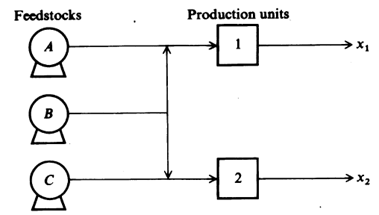

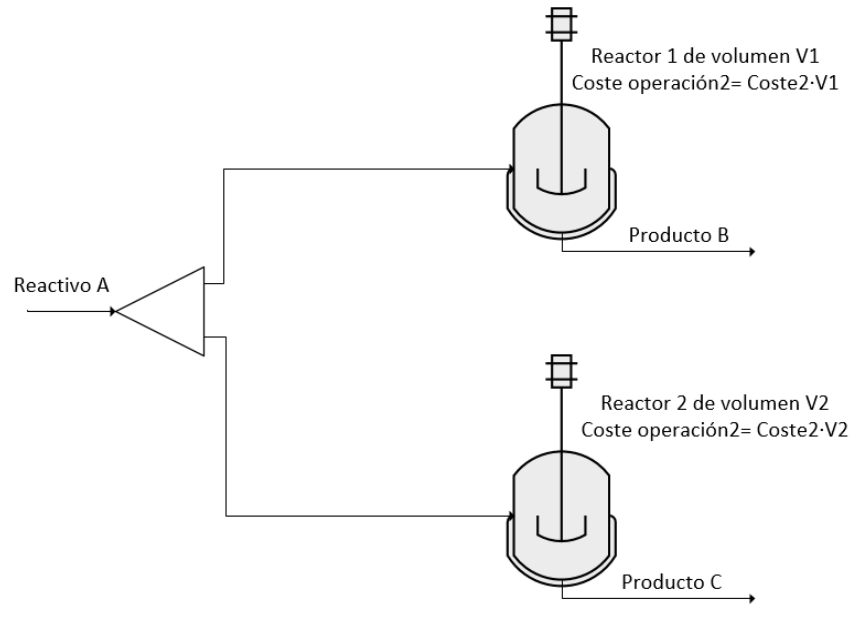

In [1]:
from IPython.display import Image 
Image(filename="img_enun/MILP4.png",width=250)

In [2]:
from pyomo.environ import *
model=ConcreteModel()

#### En primer lugar consideramos que se pueden producir los dos productos a la vez. Suponemos que la cinética de la reacción es tal que para producir un kg de Fb se consume un kg de A, y lo mismo para C. 

In [3]:
model.V1=Var(within=NonNegativeReals,bounds=(0,50))
model.V2=Var(within=NonNegativeReals,bounds=(0,50))
model.Fb=Var(within=NonNegativeReals,bounds=(0,90))
model.Fc=Var(within=NonNegativeReals,bounds=(0,80))

model.obj = Objective(expr = (23-10)*model.Fb+(28-10)*model.Fc-11*model.V1-14*model.V2, sense=maximize)

model.C1=Constraint(expr = model.Fb==1.98*model.V1)
model.C2=Constraint(expr = model.Fc==2.11*model.V2)

results = SolverFactory('glpk').solve(model).write()
model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1579.19431279621
  Upper bound: 1579.19431279621
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 5
  Number of nonzeros: 5
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.05983924865722656
# ----------------------------------------------------------
#   Solution Information
# ---------------

In [4]:

model.y1=Var(within=Binary)
model.y2=Var(within=Binary)

#### Añadimos una restricción adicional para tener en cuenta que: $$y_1+y_2 = 1$$ y asociamos las variables continuas (Fb y Fc) a las binarias

In [5]:
model.C4=Constraint(expr = model.y1+model.y2 == 1)
model.C5=Constraint(expr = model.Fb <= model.y1*90)
model.C6=Constraint(expr = model.Fc <= model.y2*80)

results = SolverFactory('glpk').solve(model).write()
model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 909.194312796209
  Upper bound: 909.194312796209
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 7
  Number of nonzeros: 11
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.05684256553649902
# ----------------------------------------------------------
#   Solution Information
# --------------